Problem Statement 2:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

Dataset Information:
The online_retail.csv contains 387961 rows and 8 columns.
Feature Name : Description
Invoice : Invoice number
StockCode : Product ID
Description : Product Description
Quantity  : Quantity of the product
InvoiceDate  : Date of the invoice
Price  : Price of the product per unit
CustomerID : Customer ID
Country  :Region of Purchase

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.

2. Segment the customers based on their purchasing behavior

In [1]:
# firstly import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load a dataset first than we will do data cleaning part if it is needed
data=pd.read_csv('OnlineRetail (1).csv',encoding='iso-8859-1',skipinitialspace=True)
data.head(5) #top5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.tail(5) # looking for last 5 records

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
# let's check the shape of data
data.shape

(541909, 8)

In the given data of online retail store, there are 5,41,909 records(rows) and 8 features(columns).

In [5]:
#imformation regarding columns datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From here we can observe that invoice number, stock code,invoice date are not in the proper datatype.

also we can see that there missing values in the description and in customer id so we will fix it out.

In [6]:
data[data.duplicated()] #checking for duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


So, there are 5268  records are duplicate. and 5268 no of duplicate values are there.

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Also there are lot of missing values are there. we will exime them.


In [8]:
print('No of uniqe ids in the invocieNo : ',data['InvoiceNo'].nunique())
print('Unique invoice numbers : ',data['InvoiceNo'].unique())

No of uniqe ids in the invocieNo :  25900
Unique invoice numbers :  ['536365' '536366' '536367' ... '581585' '581586' '581587']


some of values in invoice data are start with "c" these are cancelled transactions.

In [9]:
cancelled=data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


As you can see there are 9288 records are from cancelled transactions.
Also you can see some stockcodes are containing alphabets.Moreover, Quantity columns are showing negative values. and Descriptin column has in appropriate format. we need to clean all this thing first

In [10]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


There are 10624 records with negative quantities. reason could be return of the products,some discounts etc. lets try to check for unit price also.

In [11]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [12]:
data=data[data['UnitPrice']>=0]

So, there negative unit price. but by seeing in description it is clear that it is for utilisation. so we can drop them.

In [13]:
#checking for in canlled transactions any record is there with the positive quantity so we can drop all cancelled transactions
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No record is there, that shows that all recordsare negative quantity records  in cencelled data.so we can ndrop all these records from the main data

In [14]:
data=data[data['Quantity']>0]

In [15]:
data.shape

(531283, 8)

In [16]:
#cheking for any records having zero quantity and zero unit price because it means nothing to us.
data[(data['Quantity']==0) | data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,12/7/2011 18:36,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom


We can see that there are 1179 records with 0-unit price also some of them having null value in description and customer. also, we will drop all these null customer ids. why?
because, without customer identification, it's challenging to analyse and segment customers effectively based on their purchasing behaviour or other attributes. The dataset used for segmentation analysis is complete and consistent. Complete data enables more robust and reliable segmentation models, leading to more actionable insights for marketing strategies, product recommendations, and customer engagement initiatives.


In [17]:
print('No. of records having zero unit price : ',data[data['UnitPrice']==0]['UnitPrice'].count())
print('Percentage of records having zero unit price : ',(data[data['UnitPrice']==0]['UnitPrice'].count()/data.shape[0])*100,'%')

No. of records having zero unit price :  1179
Percentage of records having zero unit price :  0.22191562688811803 %


Too less records so no much information loss.

In [18]:
data=data[data['UnitPrice']>0]

In [19]:
#now check for the null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

we can observe that all by removing all unnecesarry data description column has '0' null values.

In [20]:
#from above codes we show duplicate transactions are there lets drop them
data.duplicated().sum()

5226

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
# droping null values for customer id columns
data=data.dropna(subset=['CustomerID'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


After cleaning this much there are 392692 records.

As menstioned above there are some records in description are not in same case and some aplphabets in stockcode.so now let's deal with it.

In [24]:
data['Description'] = data['Description'].str.lower()  # Convert to lowercase
data['Description'] = data['Description'].str.replace('[^\w\s]', '')  # Remove punctuation
print('No of Unique descriptions are',data['Description'].nunique())

No of Unique descriptions are 3865


In [25]:
# Function to remove non-numeric characters from a string and convert it to int
def clean_and_convert_to_int(value):
    # Remove non-numeric characters (keep only digits)
    cleaned_value = ''.join(filter(str.isdigit, value))
    # Convert to integer
    return int(cleaned_value) if cleaned_value else None  # Convert to None if cleaned value is empty

# Apply the function to 'InvoiceNo' and 'StockCode' columns
data['StockCode'] = data['StockCode'].apply(clean_and_convert_to_int)

# Print the first few rows to verify the changes
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123.0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053.0,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406.0,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029.0,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029.0,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    391283 non-null  float64
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [27]:
data.duplicated().sum()

34

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [30]:
data['InvoiceNo']=data['InvoiceNo'].astype(int)

In [31]:
data.reset_index(inplace=True)
data.drop(columns='index',inplace=True)

In [32]:
#final check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392658 entries, 0 to 392657
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392658 non-null  int32         
 1   StockCode    391249 non-null  float64       
 2   Description  392658 non-null  object        
 3   Quantity     392658 non-null  int64         
 4   InvoiceDate  392658 non-null  datetime64[ns]
 5   UnitPrice    392658 non-null  float64       
 6   CustomerID   392658 non-null  float64       
 7   Country      392658 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(2)
memory usage: 22.5+ MB


Here we completed all the data cleaning proccess.

Now we look forward to perform EDA.

for further analysis wewill create  some columns into our data


In [33]:
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Month/year']=pd.to_datetime(data[['Year','Month']].assign(day=1))
data['Week_day']=data['InvoiceDate'].dt.day_name()
data['Quarter']=data['InvoiceDate'].dt.quarter
data['Hour']=data['InvoiceDate'].dt.hour

In [34]:
data['Total_Amount']=data['Quantity']*data['UnitPrice']

In [35]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month/year,Week_day,Quarter,Hour,Total_Amount
0,536365,85123.0,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,15.30
1,536365,71053.0,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
2,536365,84406.0,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,22.00
3,536365,84029.0,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
4,536365,84029.0,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392653,581587,22613.0,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,2011-12-01,Friday,4,12,10.20
392654,581587,22899.0,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,2011-12-01,Friday,4,12,12.60
392655,581587,23254.0,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,Friday,4,12,16.60
392656,581587,23255.0,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,Friday,4,12,16.60


Now we will create some data frames to do more analysis.

In [36]:
count_per_hour=data.groupby('Hour')['InvoiceNo'].count().reset_index()
count_per_week_day=data.groupby('Week_day')['InvoiceNo'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
count_per_month=data.groupby('Month')['InvoiceNo'].count().reset_index()
count_per_quarter=data.groupby('Quarter')['InvoiceNo'].count().reset_index()
count_per_year=data.groupby('Year')['InvoiceNo'].count().reset_index()
monthly_sales=data.groupby('Month')['Total_Amount'].sum().reset_index()
monthly_avg_sales=data.groupby('Month')['Total_Amount'].mean().reset_index()
Quarterly_revenue=data.groupby('Quarter')['Total_Amount'].sum().reset_index()
Querterly_avg_revenue=data.groupby('Quarter')['Total_Amount'].mean().reset_index()
Yearly_revenue=data.groupby('Year')['Total_Amount'].sum().reset_index()
Yearly_avg_revenue=data.groupby('Year')['Total_Amount'].mean().reset_index()

In [37]:
data['Date']=data['InvoiceDate'].dt.date
Daily_sales=data.groupby('Date')['Total_Amount'].sum().reset_index()


In [38]:
#plot of no of orders are placing hourly
def plot_line_graphs(dataframe,xax,yax) :
   trace=go.Line(x=dataframe[xax],y=dataframe[yax],mode='lines',line=dict(color='blue', width=2), marker=dict(color='red', size=10))
   layout=go.Layout(title='No of {} per {}'.format(yax,xax),xaxis_title=xax,yaxis_title='Sales/count/revenue/average')
   fig=go.Figure([trace],layout=layout)
   return fig.show()
def plot_Bar_graphs(dataframe,xax,yax) :
   plt.figure(figsize=(15,10))
   color=['steelblue','indianred','forestgreen','coral','blueviolet','lightslategray','burlywood','tan','sienna','gainsboro','dimgray','orangered','seagreen','salmon','royalblue']
   trace=go.Bar(x=dataframe[xax],y=dataframe[yax],marker=dict(color=color, line=dict(color='black', width=1)))
   layout=go.Layout(title='No of {} per {}'.format(yax,xax),xaxis_title=xax,yaxis_title='Sales/count/revenue/average')
   fig=go.Figure([trace],layout=layout)
   return fig.show()

In [39]:
plot_Bar_graphs(count_per_hour,'Hour','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

Clearly we can see that major no. orders are plaing between 9 a.m to 5 p.m.
and most number of orders are placing around 12:00 p.m.

In [40]:
#plot of no of orders are placing on each week day
plot_Bar_graphs(count_per_week_day,'Week_day','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

Most no of orders are placing on wednsday and thursday around 147k.
and least on friday.
Surprisingly, there are no data placing on Saturday.

In [41]:
count_per_week_day

,Week_day,InvoiceNo
0,Monday,64229
1,Tuesday,65742
2,Wednesday,68036
3,Thursday,79229
4,Friday,54218
5,Sunday,61204


In [42]:
#ploting count of orders for th months
plot_Bar_graphs(count_per_month,'Month','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

Most number of orders are placing between September to december. and least are placing in month of february.

In [43]:
#orders placing by quarter
plot_Bar_graphs(count_per_quarter,'Quarter','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

By passing moths trend says that orders are placing more.

In [44]:
#poting plaicng orders according to years
plot_Bar_graphs(count_per_year,'Year','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

So, More customers added in 2011 and more orders placed.

Now, let's Check about the Sales and revenues.

In [45]:
# Sales vs month
plot_line_graphs(monthly_sales,'Month','Total_Amount')

c:\Users\VIVEK\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Observing that as orders placing are increasing Sales per month are also increasing.
higest Sales happend in November...Maybe because of christmas will come in December.


In [46]:
#from these 2 years let's try to find which month from both years cusromers are spending more money
month_year_sales=data.groupby('Month/year')['Total_Amount'].sum().reset_index()
plot_line_graphs(month_year_sales,'Month/year','Total_Amount')

c:\Users\VIVEK\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In November of 2011 Customers spent more money to buy products.

In [47]:
# ploting sales over daily basis
plot_line_graphs(Daily_sales,'Date','Total_Amount')

c:\Users\VIVEK\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Now,we are going to analyise Price variable.

In [48]:
# Descriptive statistic
data['UnitPrice'].describe()

count    392658.000000
mean          3.126093
std          22.242790
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Highest unit price sold from this online retail store is pricing of 8142.75.
and min was 0.001.
This online store probably sells small products.

In [49]:
# filetring description for some the pricing
data[data['UnitPrice']>=50]['Description'].unique()

array(['rustic  seventeen drawer sideboard', 'carriage',
       'vintage post office cabinet', 'vintage red kitchen cabinet',
       'regency mirror with shutters', 'love seat antique white metal',
       'vintage blue kitchen cabinet', 'school desk and chair ',
       'chest natural wood 20 drawers',
       'decorative hanging shelving unit', 'manual', 'postage',
       'picnic basket wicker 60 pieces', 'dotcom postage'], dtype=object)

there are transactions where shipping fee and retailer fee charged.


<Axes: xlabel='UnitPrice', ylabel='Density'>

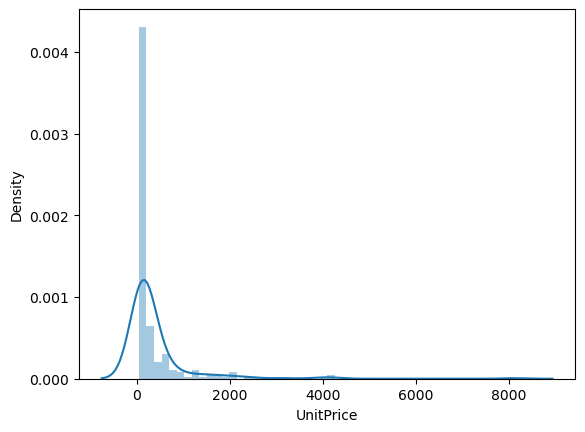

In [50]:
#destribution of expensive products
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'],kde=True)

In [51]:
#try to analysie by the country
customers_country=data[['Country','CustomerID']].drop_duplicates()
customers_country

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
389739,United Kingdom,13436.0
389811,United Kingdom,15520.0
390538,United Kingdom,13298.0
391254,United Kingdom,14569.0


So, there 4346 unique customers from different cities.

In [52]:
customers_country.groupby('Country')['CustomerID'].count().reset_index().sort_values(by='CustomerID',ascending=False)

,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


So, there are 36 different countries are there. and most number of unique customers are from UK. So focus more on UK for customer segmentaion.

In [53]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [54]:
data[data['Country']=='Unspecified'].count()[0]

241

You can see in above there 241 transactions where country is 'Unspecified'.

In [55]:
country_sales=data.groupby('Country')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount',ascending=False).reset_index(drop=True)
country_order_count=data.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by='InvoiceNo',ascending=False).reset_index(drop=True)

In [56]:
# ploting bar plot for top 10 countries on Sales
plot_Bar_graphs(country_sales.head(10),'Country','Total_Amount')

<Figure size 1500x1000 with 0 Axes>

In [57]:
# ploting bar plot of top 10 countries on placing of orders
plot_Bar_graphs(country_order_count.head(10),'Country','InvoiceNo')

<Figure size 1500x1000 with 0 Axes>

Obviously UK is on top for the both aspect.

In [58]:
# now finding for top Customer...
# first according to count
data['c_o_c_order']=data.groupby('CustomerID')['CustomerID'].transform('count')
# according to who contribute in the revenue
customers_Sales_wise=data.groupby('CustomerID')['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount',ascending=False).reset_index(drop=True)


In [59]:
customers_Sales_wise.head(10)

,CustomerID,Total_Amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17
5,12415.0,124914.53
6,14156.0,117210.08
7,17511.0,91062.38
8,16029.0,80850.84
9,12346.0,77183.60


Above is the records of top 10 cusomers who are more contributing through the Sales.

In [60]:
# now lets get all the details of these customers
top_customer_id_list=list(customers_Sales_wise.head(10).iloc[:,0])
top_customer_data=data[data['CustomerID'].isin(top_customer_id_list)][['Country','CustomerID','Quantity','Total_Amount','c_o_c_order']]

In [61]:
top_customer_data

,Country,CustomerID,Quantity,Total_Amount,c_o_c_order
173,United Kingdom,16029.0,36,178.20,241
174,United Kingdom,16029.0,100,165.00,241
175,United Kingdom,16029.0,100,165.00,241
176,United Kingdom,16029.0,192,733.44,241
177,United Kingdom,16029.0,192,647.04,241
...,...,...,...,...,...
391858,United Kingdom,18102.0,126,449.82,431
391859,United Kingdom,18102.0,126,491.40,431
391860,United Kingdom,18102.0,126,522.90,431
392192,United Kingdom,16446.0,80995,168469.60,3


In [62]:
top_customer_data['Country'].unique()

array(['United Kingdom', 'EIRE', 'Netherlands', 'Australia'], dtype=object)

So, All the top customers are belonging to Uk, EIRE, Netherland and Australia.

Here is end of analysis. now further we are going to observe customers behaviour. and Particullary for country UK.

# **RFM analysis :**
 RFM analysis involves assigning numerical scores to each customer based on their recency, frequency, and monetary value metrics. These scores can then be used to segment customers into different groups, such as high-value, medium-value, and low-value customers

In [63]:
data_uk=data[data['Country']=='United Kingdom']

In [64]:
data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Month/year,Week_day,Quarter,Hour,Total_Amount,Date,c_o_c_order
0,536365,85123.0,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,15.30,2010-12-01,297
1,536365,71053.0,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34,2010-12-01,297
2,536365,84406.0,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,22.00,2010-12-01,297
3,536365,84029.0,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34,2010-12-01,297
4,536365,84029.0,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,Wednesday,4,8,20.34,2010-12-01,297


In [65]:
print(data_uk['InvoiceDate'].min())
print(data_uk['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [66]:
import datetime as dt
presence=dt.datetime(2011,12,12)# storing date from which all the segment will happen.

In [67]:
#creating a data frame and sotring columns for our metrices
rfm = data_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total_Amount': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'Total_Amount': 'monetary_value'}, inplace=True) #changing column names

In [68]:
rfm.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,327,1,77183.60
12747.0,4,103,4196.01
12748.0,2,4412,33053.19
12749.0,5,199,4090.88
12820.0,5,59,942.34


In [69]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3920 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         3920 non-null   int32  
 1   frequency       3920 non-null   int64  
 2   monetary_value  3920 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 107.2 KB


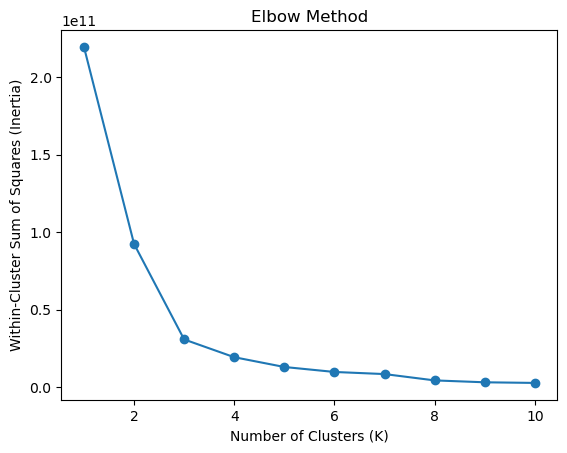

In [70]:
#method 1 for  segnentation uisnf kmeans
from sklearn.cluster import KMeans

#selecting clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()


By Elbow method there should be 3 clusters. let's confirm it with the silhouette score

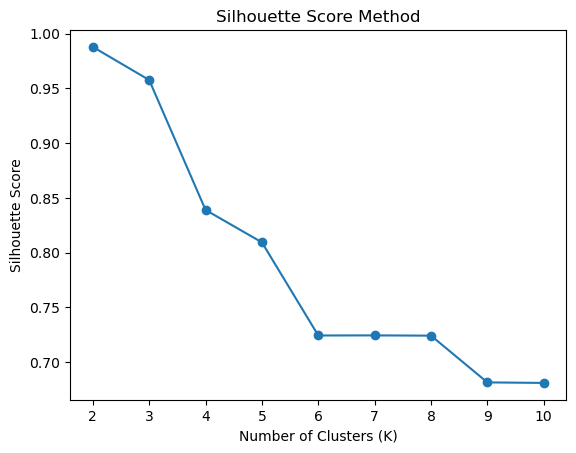

In [71]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(rfm, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


Here, k=4 more appropriate.

In [72]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(rfm)
labels=kmeans.labels_
rfm['clusters']=labels

In [73]:
rfm.head()

,recency,frequency,monetary_value,clusters
CustomerID,,,,
12346.0,327,1,77183.60,2
12747.0,4,103,4196.01,0
12748.0,2,4412,33053.19,2
12749.0,5,199,4090.88,0
12820.0,5,59,942.34,0


In [74]:
#method 2 for segnentation uisng Rfm Quartiels
# Assign quartile ranks to each RFM score
rfm['RecencyQuartile'] = pd.qcut(rfm['recency'], q=4, labels=False)
rfm['FrequencyQuartile'] = pd.qcut(rfm['frequency'], q=4, labels=False)
rfm['MonetaryValueQuartile'] = pd.qcut(rfm['monetary_value'], q=4, labels=False)

# Combine quartiles into one RFM segment
rfm['RFMSegment'] = rfm['RecencyQuartile'].astype(str) + rfm['FrequencyQuartile'].astype(str) + rfm['MonetaryValueQuartile'].astype(str)


In [75]:
rfm

,recency,frequency,monetary_value,clusters,RecencyQuartile,FrequencyQuartile,MonetaryValueQuartile,RFMSegment
CustomerID,,,,,,,,
12346.0,327,1,77183.60,2,3,0,3,303
12747.0,4,103,4196.01,0,0,3,3,033
12748.0,2,4412,33053.19,2,0,3,3,033
12749.0,5,199,4090.88,0,0,3,3,033
12820.0,5,59,942.34,0,0,2,2,022
...,...,...,...,...,...,...,...,...
18280.0,279,10,180.60,0,3,0,0,300
18281.0,182,7,80.82,0,3,0,0,300
18282.0,9,12,178.05,0,0,0,0,000


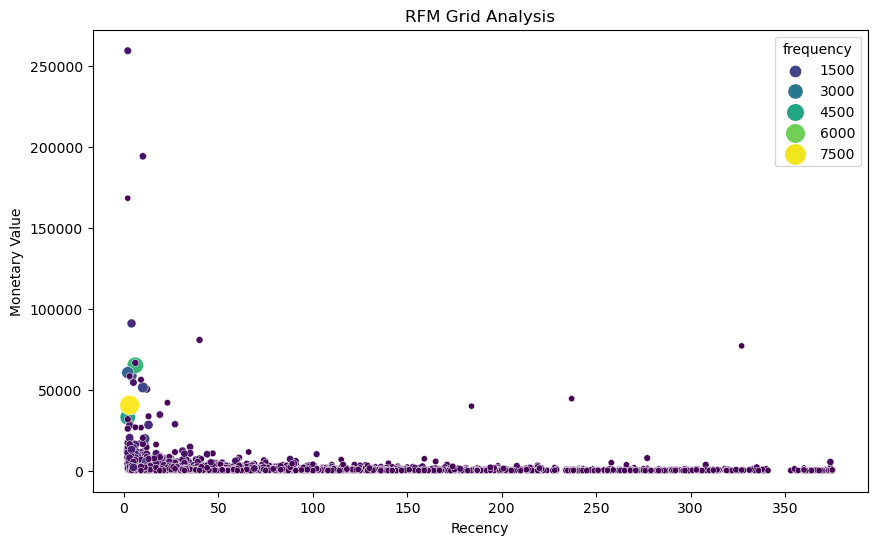

In [76]:
#method 3 for  segnentation uisng Plot RFM grid
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recency', y='monetary_value', hue='frequency', palette='viridis', size='frequency', sizes=(20, 200))
plt.title('RFM Grid Analysis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()


In [77]:
#method 4 for  segnentation uisng weights
# Define weights for RFM metrics
weights = {'Recency': 0.5, 'Frequency': 0.3, 'MonetaryValue': 0.2}

# Calculate weighted RFM score for each customer
rfm['WeightedRFMScore'] = (rfm['recency'] * weights['Recency']) + (rfm['frequency'] * weights['Frequency']) + (rfm['monetary_value'] * weights['MonetaryValue'])


In [78]:
rfm

,recency,frequency,monetary_value,clusters,RecencyQuartile,FrequencyQuartile,MonetaryValueQuartile,RFMSegment,WeightedRFMScore
CustomerID,,,,,,,,,
12346.0,327,1,77183.60,2,3,0,3,303,15600.520
12747.0,4,103,4196.01,0,0,3,3,033,872.102
12748.0,2,4412,33053.19,2,0,3,3,033,7935.238
12749.0,5,199,4090.88,0,0,3,3,033,880.376
12820.0,5,59,942.34,0,0,2,2,022,208.668
...,...,...,...,...,...,...,...,...,...
18280.0,279,10,180.60,0,3,0,0,300,178.620
18281.0,182,7,80.82,0,3,0,0,300,109.264
18282.0,9,12,178.05,0,0,0,0,000,43.710


In [79]:
rfm.RFMSegment.unique()

array(['303', '033', '022', '300', '222', '203', '211', '011', '113',
       '111', '311', '233', '132', '333', '212', '121', '122', '220',
       '301', '223', '232', '322', '201', '200', '133', '321', '032',
       '101', '002', '110', '023', '302', '123', '013', '010', '210',
       '131', '100', '323', '001', '310', '000', '313', '031', '312',
       '012', '213', '102', '202', '320', '221', '021', '112', '120',
       '020', '332', '103', '231', '331', '030', '003'], dtype=object)

In [80]:
rfm[rfm['clusters']==2]

,recency,frequency,monetary_value,clusters,RecencyQuartile,FrequencyQuartile,MonetaryValueQuartile,RFMSegment,WeightedRFMScore
CustomerID,,,,,,,,,
12346.0,327,1,77183.60,2,3,0,3,303,15600.520
12748.0,2,4412,33053.19,2,0,3,3,033,7935.238
12931.0,23,82,42055.96,2,1,2,3,123,8447.292
13081.0,13,1024,28337.38,2,0,3,3,033,5981.176
13089.0,4,1814,58762.08,2,0,3,3,033,12298.616
13098.0,3,572,28882.44,2,0,3,3,033,5949.588
13408.0,3,478,28117.04,2,0,3,3,033,5768.308
13694.0,5,568,65039.62,2,0,3,3,033,13180.824
13777.0,2,197,25977.16,2,0,3,3,033,5255.532


In [82]:
print('Champion Customers  from UK are {} and {}%'.format(rfm[rfm['RFMSegment']=='033'].count()[0],round((rfm[rfm['RFMSegment']=='033'].count()[0]/rfm['RFMSegment'].count())*100,2) ))
print('Loyal Customers from UK are {} and {}%'.format(rfm[rfm['FrequencyQuartile']==3].count()[0],round((rfm[rfm['FrequencyQuartile']==3].count()[0]/rfm['RFMSegment'].count())*100,2)))
print('Money Spender Customers from UK are {} and {}%'.format(rfm[rfm['MonetaryValueQuartile']==3].count()[0],round((rfm[rfm['MonetaryValueQuartile']==3].count()[0]/rfm['RFMSegment'].count())*100,2)))
print('New customers from UK are {} and {}%'.format(rfm[rfm['RFMSegment'].isin(['010','013','002','001'])].count()[0],round((rfm[rfm['RFMSegment'].isin(['300','303','302','301'])].count()[0]/rfm['RFMSegment'].count())*100,2)))
print('Customers from UK who are on the verg of sleep out {} and {}%'.format(rfm[rfm['RFMSegment'].isin(['111','121','211','210','101','200'])].count()[0],round((rfm[rfm['RFMSegment'].isin(['111','121','211','210','101','200'])].count()[0]/rfm['RFMSegment'].count())*100,2)))
print('Lost Customers from UK are {} and {}%'.format(rfm[rfm['RFMSegment'].isin(['300','100'])].count()[0],round((rfm[rfm['RFMSegment'].isin(['300','100'])].count()[0]/rfm['RFMSegment'].count())*100,2))),

Champion Customers  from UK are 407 and 10.38%
Loyal Customers from UK are 969 and 24.72%
Money Spender Customers from UK are 980 and 25.0%
New customers from UK are 73 and 12.22%
Customers from UK who are on the verg of sleep out 552 and 14.08%
Lost Customers from UK are 456 and 11.63%


(None,)

Recommendation :

while collecting this dataset from the real world there some issue whithin it.

    1) larg number of customerids are note present.
    
    2) Stockcode are not in valid form contains different letters/aplphabets
    
    3) In Description also missing values are there and not in proper form.
    
    4) each stockcode should be assign to only one product.This rule not kept in this data set.So this is first recommendation.

  Secondly, Based on RFM analysis for segmentation we can see that there are larg percentage of customers in UK are loyal and money spenders.So according to this there should be  some special campaings for those customers.

  Third one, There are some percentage of customers are on the verg of sleep or already lost them.So do some extra effort to keep them.. through some campaigns or providing discounts or special offers etc...
